In [4]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch


# Specify the path or name of the fine-tuned model
model = "distilbert-base-uncased-finetuned-sst-2-english"

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model)

# Load the fine-tuned model
model = AutoModelForSequenceClassification.from_pretrained(model)

# Function to make predictions
def predict(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predictions = torch.softmax(logits, dim=-1)
    return predictions

# Example usage
if __name__ == "__main__":
    sample_text = "Bangalore climate is the best"
    predictions = predict(sample_text)
    print(f"Predictions: {predictions}")

Predictions: tensor([[2.5634e-04, 9.9974e-01]])


Logits per image: tensor([[24.1805, 14.8860]])
Logits per text: tensor([[24.1805],
        [14.8860]])
Most similar text for the given image: 'A picture of a car'


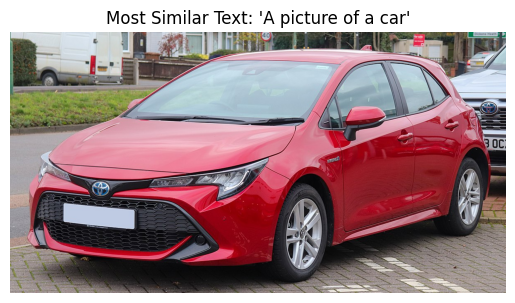

In [7]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch
import matplotlib.pyplot as plt

# Function to load and preprocess image and text inputs
def preprocess_inputs(model_name_or_path, text_inputs, image_path):
    # Load the CLIP model and processor
    model = CLIPModel.from_pretrained(model_name_or_path)
    processor = CLIPProcessor.from_pretrained(model_name_or_path)

    # Open the image
    image = Image.open(image_path)

    # Preprocess the inputs
    inputs = processor(text=text_inputs, images=image, return_tensors="pt", padding=True)

    return model, inputs, image

# Function to get similarity scores
def get_similarity_scores(model, inputs):
    with torch.no_grad():
        outputs = model(**inputs)

    logits_per_image = outputs.logits_per_image   # Image-to-text similarity
    logits_per_text = outputs.logits_per_text     # Text-to-image similarity

    return logits_per_image, logits_per_text

# Function to find the most similar text for the image
def find_most_similar_text(logits_per_image, text_inputs):
    most_similar_text_index = logits_per_image.argmax()
    return text_inputs[most_similar_text_index]

# Function to display the image with the most similar text
def display_image_with_text(image, most_similar_text):
    plt.imshow(image)
    plt.title(f"Most Similar Text: '{most_similar_text}'")
    plt.axis('off')  # Hide axes
    plt.show()

# Example usage
if __name__ == "__main__":
    model_name_or_path = "openai/clip-vit-base-patch32"
    text_inputs = ["A picture of a car", "A picture of a house"]
    image_path = "/content/11111.jpg"

    # Preprocess inputs
    model, inputs, image = preprocess_inputs(model_name_or_path, text_inputs, image_path)

    # Get similarity scores
    logits_per_image, logits_per_text = get_similarity_scores(model, inputs)

    # Find the most similar text
    most_similar_text = find_most_similar_text(logits_per_image, text_inputs)

    # Print the similarity scores
    print(f"Logits per image: {logits_per_image}")
    print(f"Logits per text: {logits_per_text}")
    print(f"Most similar text for the given image: '{most_similar_text}'")

    # Display the image with the most similar text
    display_image_with_text(image, most_similar_text)